# Importing Necessary Libraries & Dataset

In [ ]:
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot
from sklearn.metrics import accuracy_score

In [ ]:
def load_data(cols):
    iris = sns.load_dataset("iris")
    iris = iris.tail(100)
    # print(iris)
    # print()
 
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris["species"])  # versicolor & virginica k 1,0 diye denote krsi
    # print(y)
    # print()
 
    X = iris.drop(["species"], axis=1)  # Target column drop korsi
    # print(X)
 
    if len(cols) > 0:
        X = X[cols]            # X er moddhe 2ta features ["petal_length", "petal_width"] niye ashci
 
    return X.values, y

In [ ]:
cols = ["petal_length", "petal_width"]
X, y = load_data(cols)
print(X)
print()
print(y)

[[4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]
 [4.6 1.4]
 [4.  1.2]
 [3.3 1. ]
 [4.2 1.3]
 [4.2 1.2]
 [4.2 1.3]
 [4.3 1.3]
 [3.  1.1]
 [4.1 1.3]
 [6.  2.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.6 1.8]
 [5.8 2.2]
 [6.6 2.1]
 [4.5 1.7]
 [6.3 1.8]
 [5.8 1.8]
 [6.1 2.5]
 [5.1 2. ]
 [5.3 1.9]
 [5.5 2.1]
 [5.  2. ]
 [5.1 2.4]
 [5.3 2.3]
 [5.5 1.8]
 [6.7 2.2]
 [6.9 2.3]
 [5.  1.5]
 [5.7 2.3]
 [4.9 2. ]
 [6.7 2. ]
 [4.9 1.8]
 [5.7 2.1]
 [6.  1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.6 2.1]
 [5.8 1.6]
 [6.1 1.9]
 [6.4 2. ]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]
 [6.1 2.3]
 [5.6 2.4]
 [5.5 1.8]
 [4.8 1.8]
 [5.4 2.1]
 [5.6 2.4]

# SVM built-in

In [ ]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

In [ ]:
# train the model
clf.fit(X, y)

SVC(kernel='linear')

No handles with labels found to put in legend.


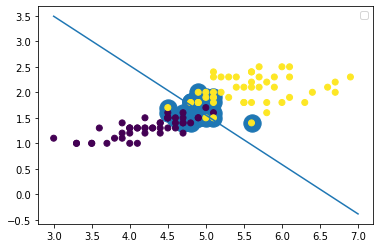

In [ ]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(3, 7)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy)
# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, linewidth=1)

# show the plot visually
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()
plt.show()

In [ ]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[2.1829247  2.25365588]]
b =  [-14.41486828]
Indices of support vectors =  [ 0  2  4  6 13 20 22 26 27 33 35 36 56 69 71 73 76 77 83 84 88 92 96 99]
Support vectors =  [[4.7 1.4]
 [4.9 1.5]
 [4.6 1.5]
 [4.7 1.6]
 [4.7 1.4]
 [4.8 1.8]
 [4.9 1.5]
 [4.8 1.4]
 [5.  1.7]
 [5.1 1.6]
 [4.5 1.6]
 [4.7 1.5]
 [4.5 1.7]
 [5.  1.5]
 [4.9 2. ]
 [4.9 1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.1 1.5]
 [5.6 1.4]
 [4.8 1.8]
 [5.1 1.9]
 [5.  1.9]
 [5.1 1.8]]
Number of support vectors for each class =  [12 12]
Coefficients of the support vector in the decision function =  [[0.70731176 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.70731176 1.         1.        ]]


# SVM Raw

**SVM Classifier**

Equation of the Hyperplane:

**y = wx - b**

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [ ]:
learning_rate=0.001
no_of_iterations=10
lambda_parameter=0.01
y_label = y
y_pred = []
y_hat=[]
m, n = X.shape
w = np.zeros(n)
    #print("1st=", w)
b = 0

In [ ]:
# fitting the dataset to SVM Classifier
def fit():
    w = np.zeros(n)
    #print("1st=", w)
    b = 0
    # implementing Gradient Descent algorithm for Optimization
    for i in range(no_of_iterations):
      for index, x_i in enumerate(X):
        condition = y_label[index] * (np.dot(x_i, w) - b) >= 1
        if (condition == True):
          dw = 2 * lambda_parameter * w
          db = 0
        else:
          dw = 2 * lambda_parameter * w - np.dot(x_i, y_label[index])
          db = y_label[index]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        print(w[0], "-", w[1])
        # print("\nb=", b)

    output = np.dot(X, w) - b
    predicted_labels = np.sign(output)
    for i in range(len(output)):
      if(output[i]<1):
        y_hat.append(0)
      else:
        y_hat.append(1)

    #y_hat = np.where(output <= 0, 0, 1)
    # plot results
    def get_hyperplane(x, w, b, offset=0):
      return (-w[0] * x - b + offset) / w[1]

    fig, ax = plt.subplots(1, 1, figsize=(10,6))

    plt.set_cmap('PiYG')
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, alpha=0.75)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    plt.show()    
    return y_hat
    #print("Y=", y_hat)

0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.0 - 0.0
0.006 - 0.0025
0.01109988 - 0.00439995
0.0169996580024 - 0.006499862001
0.022599318009239953 - 0.008299732003759979
0.02839886602287977 - 0.010499566009119905
0.03499829804555931 - 0.012599356017799723
0.0394975980795984 - 0.014299104030679367
0.045796808127636805 - 0.016098818048598754
0.05159589219147425 - 0.01789849607223778
0.057694860273630424 - 0.020398138102316336
0.06279370637642495 - 0.02239773013955429
0.06809245050229742 - 0.0242972821849515
0.07359108865328738 - 0.0263967962393078
0.

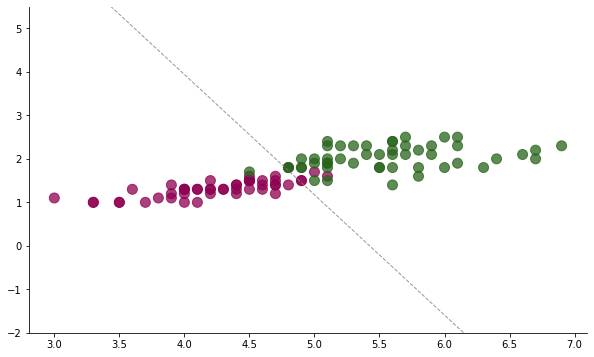

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
X_train_prediction = fit()
X_train_prediction

In [ ]:
training_data_accuracy = accuracy_score(y, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.85
